In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cactusLib import filterLib

/home/cvargas/.local/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
#Start with gaussian white noise
mu = 0.
sigma = 100.
Nx = 512
Ny = 512
N = np.random.normal(mu,sigma,(Ny,Nx))

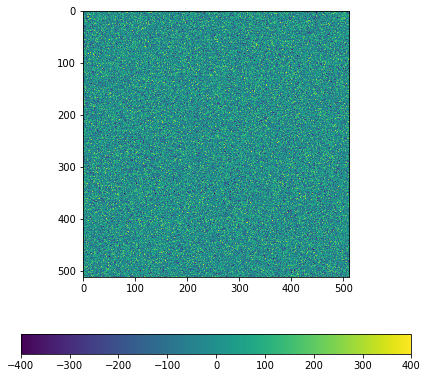

In [3]:
plt.figure(figsize=(7,7))
plt.imshow(N,vmin=-400.,vmax=+400.)
plt.colorbar(orientation="horizontal")

(array([3.0000e+00, 4.0000e+00, 8.2000e+01, 3.1600e+02, 1.3110e+03,
        4.0840e+03, 1.0557e+04, 2.1529e+04, 3.5537e+04, 4.6427e+04,
        4.8729e+04, 4.1259e+04, 2.7783e+04, 1.4966e+04, 6.4970e+03,
        2.2460e+03, 6.2100e+02, 1.6900e+02, 1.8000e+01, 6.0000e+00]),
 array([-484.9852402 , -437.523932  , -390.06262381, -342.60131561,
        -295.14000741, -247.67869922, -200.21739102, -152.75608283,
        -105.29477463,  -57.83346643,  -10.37215824,   37.08914996,
          84.55045816,  132.01176635,  179.47307455,  226.93438275,
         274.39569094,  321.85699914,  369.31830734,  416.77961553,
         464.24092373]),
 <a list of 20 Patch objects>)

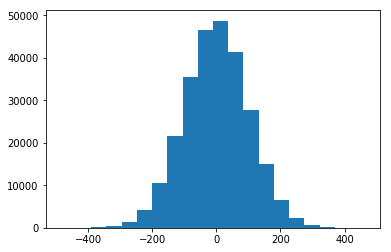

In [4]:
#Check histogram
plt.hist(N.flatten(),20)

In [5]:
#Take Fourier transform
F = np.fft.fft2(N)
#Absolute value
a = np.abs(np.fft.fft2(N))

In [6]:
#Checking the angles
theta = np.angle(F)

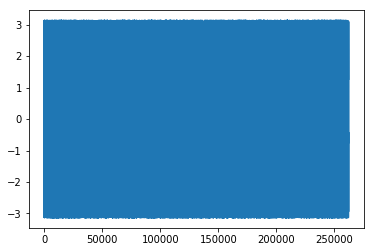

In [7]:
plt.plot(theta.flatten())

(array([26313., 26344., 26278., 26103., 26035., 26034., 26103., 26278.,
        26343., 26313.]),
 array([-3.14156955e+00, -2.51325333e+00, -1.88493711e+00, -1.25662089e+00,
        -6.28304667e-01,  1.15528536e-05,  6.28327773e-01,  1.25664399e+00,
         1.88496021e+00,  2.51327643e+00,  3.14159265e+00]),
 <a list of 10 Patch objects>)

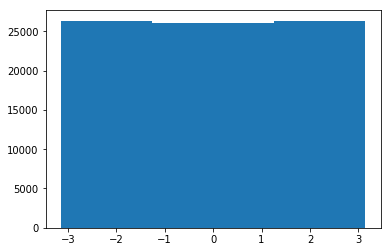

In [8]:
plt.hist(theta.flatten())

In [9]:
#Simulating new thetas
theta_s = np.random.uniform(-np.pi,+np.pi,(Ny,Nx))

#New Fourier symetrized

B_F = a*filterLib.symmetrizeFFT(np.exp(1j*theta_s))

In [10]:
#Checking the new angles
angles = np.angle(B_F)

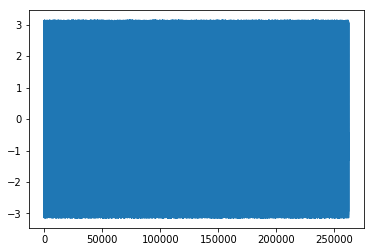

In [11]:
plt.plot(angles.flatten())

(array([26385., 26298., 26130., 26077., 26183., 26180., 26080., 26127.,
        26301., 26383.]),
 array([-3.14152847e+00, -2.51321636e+00, -1.88490424e+00, -1.25659213e+00,
        -6.28280020e-01,  3.20923037e-05,  6.28344205e-01,  1.25665632e+00,
         1.88496843e+00,  2.51328054e+00,  3.14159265e+00]),
 <a list of 10 Patch objects>)

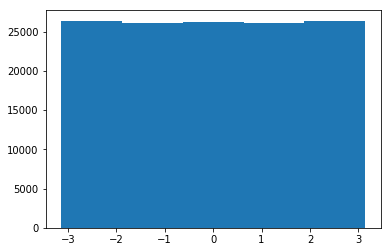

In [12]:
plt.hist(angles.flatten())

In [13]:
np.fft.ifft2(B_F)

array([[ -86.79618016-0.16771303j,   24.22879858-0.16771303j,
         -33.76517353-0.16771303j, ...,   97.96398561-0.16771303j,
         -32.67012287-0.16771303j,  100.45736586-0.16771303j],
       [  27.47353293-0.16771303j,  -69.99546342-0.16771303j,
         -99.27329564-0.16771303j, ...,  157.55579738-0.16771303j,
          -8.96361857-0.16771303j,  -91.46149902-0.16771303j],
       [  58.76945161-0.16771303j, -125.17504256-0.16771303j,
          -7.59614879-0.16771303j, ..., -142.46137523-0.16771303j,
        -116.59379059-0.16771303j,  -49.64438816-0.16771303j],
       ...,
       [  20.16720968-0.16771303j,   56.74947262-0.16771303j,
          29.1467421 -0.16771303j, ...,   13.85219297-0.16771303j,
         -84.42770331-0.16771303j,   73.80568833-0.16771303j],
       [  70.94676171-0.16771303j,   -8.48979947-0.16771303j,
         -28.24130999-0.16771303j, ...,  -61.8243038 -0.16771303j,
         -39.57843039-0.16771303j,   55.49584134-0.16771303j],
       [ -23.6012126 -0.1677

In [14]:
back = np.real(np.fft.ifft2(B_F))

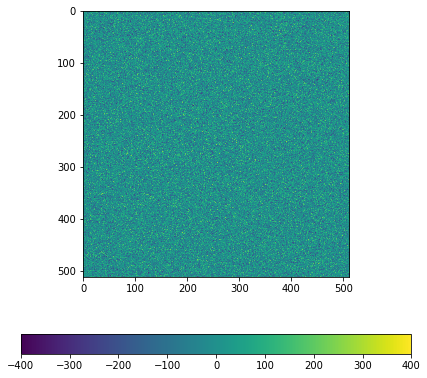

In [15]:
plt.figure(figsize=(7,7))
plt.imshow(back,vmin=-400.,vmax=+400.)
plt.colorbar(orientation="horizontal")

(array([6.0000e+00, 3.6000e+01, 1.7000e+02, 7.4500e+02, 2.4560e+03,
        6.4830e+03, 1.4182e+04, 2.5422e+04, 3.7342e+04, 4.5286e+04,
        4.5268e+04, 3.6708e+04, 2.4939e+04, 1.3634e+04, 6.2410e+03,
        2.2890e+03, 7.2000e+02, 1.8100e+02, 3.0000e+01, 5.0000e+00,
        1.0000e+00]),
 array([-314.71010535, -283.20226127, -251.6944172 , -220.18657312,
        -188.67872905, -157.17088498, -125.6630409 ,  -94.15519683,
         -62.64735276,  -31.13950868,    0.36833539,   31.87617946,
          63.38402354,   94.89186761,  126.39971169,  157.90755576,
         189.41539983,  220.92324391,  252.43108798,  283.93893205,
         315.44677613,  346.9546202 ]),
 <a list of 21 Patch objects>)

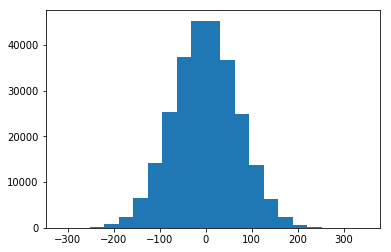

In [16]:
plt.hist(back.flatten(),21)

In [17]:
np.std(back)

70.47919742400082

In [18]:
np.std(N)

99.83424556584548

In [19]:
np.std(N)/np.std(back)

1.4165065610104148